## 1. <font color='red'> Mount Google Drive and Read the Data </font>

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import the necessary libraries
import numpy as np
import pandas as pd

In [3]:
filepath = "/content/drive/MyDrive/GENAI_Practice_data_notebooks/Food_App_Reviews.csv"

# Load your dataset and convert the review column to list
data = pd.read_csv(filepath)

In [4]:
# Display the data
data

,Review
0,Delivery was faster than a ninja on caffeine. ...
1,Im pretty sure they had a wall made of recycle...
2,Dude Im not even mad they were late. Food arri...
3,Chhole bhature yaar! Sunday indulgence crispy ...
4,The place had a vibe but I cant quite put my f...
...,...
96,Food arrived. I had a taste. Pretty standard.
97,Food was delivered. I ate. Cant complain.
98,Bao buns? Fluffy clouds of yum. Im in bao heaven.
99,Ugh it was so cozy you wouldnt believe. I mean...


In [5]:
reviews = data['Review'].tolist()
reviews

['Delivery was faster than a ninja on caffeine. Im ready to chow down!',
 'Im pretty sure they had a wall made of recycled cans. Or was it shoes?',
 'Dude Im not even mad they were late. Food arrived like a surprise party!',
 'Chhole bhature yaar! Sunday indulgence crispy bhature FTW.',
 'The place had a vibe but I cant quite put my finger on it. Hipster? Unicorn?',
 'Hakka noodles FTW! Desi-Chinese fusion for life.',
 'Pasta was alright yaar. More masala couldve made it sing.',
 'Im telling you it was like stepping into the future. Or was it the 90s?',
 'I was starving but the food came faster than I could say hangry. Good stuff.',
 'Burgers are my jam but this one was kinda meh. Needed more zing.',
 'Sushi was like a flavor adventure. Mini party in my mouth.',
 'Dude there was like this mural on the wall. It was a cat no wait a panda?',
 'Got the delivery. Ate some. Not bad.',
 'Delivery was like chillin in slow-mo. Ive aged at least a year waiting.',
 'cheesy nirvana bro. Cheese eve

## 2. <font color='red'> Use SentenceTransformers to Generate Embeddings </font>

Sentence Transformers are advanced natural language processing models that encode sentences into high-dimensional vectors. These vectors encapsulate the semantic nuances of text, offering a robust foundation for various text-related tasks, such as clustering, classification, and more.

### The Hugging Face Connection
Hugging Face, a pioneering platform in NLP, hosts an array of pre-trained models, including Sentence Transformers, that can be readily employed for diverse applications. **sentence-transformers** is a library that provides easy methods to compute embeddings (dense vector representations) for sentences, paragraphs and images. Texts are embedded in a vector space such that similar text is close, which enables applications such as semantic search, clustering, and retrieval.

### Sentence Transformers Models
Hugging Face's [Sentence Transformers collection](https://huggingface.co/sentence-transformers) includes an assortment of models designed to cater to different use cases. From general-purpose models like BERT and RoBERTa to specialized models fine-tuned for specific tasks, the library provides a plethora of choices for generating embeddings that align with your data's context.


#### **`The Mini-LM-6-v2`** models
In this demonstration, we'll use a model from the `MiniLM-L6-v2` range of Sentence Transformer models to generate embeddings.



Specifically, we will try out the `all-MiniLM-L6-v2` model. The `all-MiniLM-L6-v2` sentence transformer, trained on a large dataset of over 1 billion training pairs, is a model that maps sentences and paragraphs to a 384-dimensional dense vector space. The `all-MiniLM-L6-v2` model is designed as a general-purpose model and offers good quality embeddings. It can be used for tasks like clustering or semantic search.

In [6]:
# Install the necessary libraries
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.1/163.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 78.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [7]:
# Import the SentenceTransformer library
from sentence_transformers import SentenceTransformer

In [8]:
# Load the embedding model

model_name = "all-MiniLM-L6-v2"
model = SentenceTransformer(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [9]:
# Generate sentence embeddings
embeddings = model.encode(reviews)

In [10]:
embeddings

array([[-0.02161551, -0.02379039,  0.01384505, ..., -0.06156019,
         0.01630171,  0.00554935],
       [-0.09731576,  0.11076362, -0.01295218, ..., -0.05254167,
         0.01606344,  0.10447758],
       [ 0.01570857,  0.01586787,  0.00941281, ...,  0.04045319,
        -0.10674316, -0.01165618],
       ...,
       [ 0.02836104, -0.00742168,  0.04309877, ..., -0.05543452,
        -0.03072627, -0.00802863],
       [ 0.08122985,  0.081287  ,  0.02032981, ...,  0.03252702,
        -0.03796701,  0.04346648],
       [ 0.00110728,  0.08917958,  0.08465069, ..., -0.00465347,
        -0.03415789, -0.02372144]], dtype=float32)

In [11]:
# Size/Dimension of each embedding
embeddings[0].shape

(384,)

## 3. <font color='red'> Visualise the Embeddings through Dimensionality Reduction </font>

<p align="justify"> Modern datasets often consist of numerous features or attributes, which creates a high-dimensional space in which our data resides. However, when trying to comprehend or visualize such data directly, we run into limitations – our brains struggle to visualize beyond three dimensions, and traditional visualization methods might not accurately represent the relationships between data points in high-dimensional spaces.


UMAP, which stands for [Uniform Manifold Approximation and Projection](https://https://pair-code.github.io/understanding-umap/) is a dimensionality reduction technique that reveals local and global data relationships. It transforms high-dimensional data into a lower-dimensional space, helping us visualize clusters, trends, and similarities.


[UMAP](https://umap-learn.readthedocs.io/en/latest/) is a powerful tool in Python that can help us perform dimensionality reduction.

In [12]:
# Install the umap-learn library

!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.8 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=75bf34d3789264bd3f47579d002428bd577f0e2947ca24be0a0abbe52e5a2cb2
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [13]:
# Import umap for dimensionality reduction and matplotlib for plotting
from umap import UMAP
import matplotlib.pyplot as plt

In [14]:
# Generate tensor embeddings

embeddings = model.encode(reviews, convert_to_tensor=True)

In [15]:
embeddings

tensor([[-0.0216, -0.0238,  0.0138,  ..., -0.0616,  0.0163,  0.0055],
        [-0.0973,  0.1108, -0.0130,  ..., -0.0525,  0.0161,  0.1045],
        [ 0.0157,  0.0159,  0.0094,  ...,  0.0405, -0.1067, -0.0117],
        ...,
        [ 0.0284, -0.0074,  0.0431,  ..., -0.0554, -0.0307, -0.0080],
        [ 0.0812,  0.0813,  0.0203,  ...,  0.0325, -0.0380,  0.0435],
        [ 0.0011,  0.0892,  0.0847,  ..., -0.0047, -0.0342, -0.0237]])

In [16]:
# Reduce dimensionality with UMAP

reducer = UMAP(n_components = 2, metric='cosine')
embeddings_2d = reducer.fit_transform(embeddings)

In [17]:
embeddings_2d

array([[10.43203  , 13.158617 ],
       [13.1635685, 10.880037 ],
       [10.503671 , 11.875166 ],
       [ 6.1952143,  9.770164 ],
       [13.490908 , 10.216361 ],
       [ 4.8766794, 10.276384 ],
       [ 4.914979 ,  8.900473 ],
       [13.781293 , 10.063782 ],
       [ 9.765834 , 12.370786 ],
       [ 8.190952 , 11.867297 ],
       [ 6.777064 , 10.678346 ],
       [12.753526 , 10.5099745],
       [10.98591  , 12.84265  ],
       [10.62337  , 13.40906  ],
       [ 7.427738 , 11.512661 ],
       [11.036371 , 13.265316 ],
       [ 5.0510535,  8.762192 ],
       [ 5.8843107, 10.431886 ],
       [13.220296 , 10.321391 ],
       [10.722691 , 13.651495 ],
       [ 5.5202384, 10.081005 ],
       [ 6.4426174, 10.902687 ],
       [11.013399 , 11.912072 ],
       [10.243996 , 12.390196 ],
       [11.132315 , 12.302227 ],
       [12.623192 , 10.486484 ],
       [ 8.348891 , 11.393642 ],
       [ 8.410814 , 12.090792 ],
       [13.369632 ,  9.822609 ],
       [ 6.2514496, 11.148025 ],
       [13

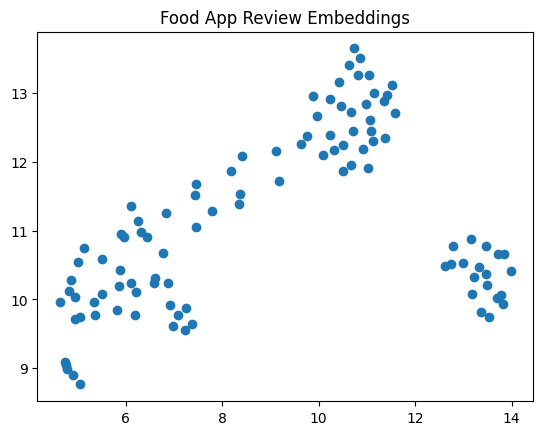

In [18]:
# Plot the embeddings

plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], marker = 'o')
plt.title('Food App Review Embeddings')
plt.show()

## 4. <font color='red'> Cluster and Visualise the Embeddings with Plotly </font>

<p align="justify"> Let's now try and interpret the embedding space. We will first cluster the data points to check similar sentences. Clustering is a vital technique that groups similar data points together based on their closeness to each other.

#### From Embeddings to Clusters

<p align="justify"> By applying clustering algorithms to our embeddings, we can group together similar embeddings, effectively creating clusters of related data points. This process enables us to uncover meaningful categories or classes within our data and helps us interpret what the clusters actually mean

In [19]:
# Import the KMeans library

from sklearn.cluster import KMeans

In [20]:
# Apply K-means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(embeddings_2d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
# Add cluster labels as a new column to the DataFrame
data['cluster_label'] = cluster_labels

In [22]:
data

,Review,cluster_label
0,Delivery was faster than a ninja on caffeine. ...,2
1,Im pretty sure they had a wall made of recycle...,0
2,Dude Im not even mad they were late. Food arri...,2
3,Chhole bhature yaar! Sunday indulgence crispy ...,1
4,The place had a vibe but I cant quite put my f...,0
...,...,...
96,Food arrived. I had a taste. Pretty standard.,2
97,Food was delivered. I ate. Cant complain.,2
98,Bao buns? Fluffy clouds of yum. Im in bao heaven.,1
99,Ugh it was so cozy you wouldnt believe. I mean...,0


In [23]:
!pip install plotly

In [25]:
import plotly.express as px

# Create a DataFrame for the data
cluster_df = pd.DataFrame({
    'x': embeddings_2d[:, 0],
    'y': embeddings_2d[:, 1],
    'label': cluster_labels,
    'sentence': data['Review']
})

# Create an interactive scatter plot using plotly
fig = px.scatter(
    cluster_df,
    x='x', y='y',
    color='label',
    hover_name='sentence',
    title='Food App Reviews 2D Embeddings',
    labels={'label': 'Cluster'},
    width=800,  # Adjust the width as desired
    height=600,  # Adjust the height as desired
)

fig.update_traces(
    marker=dict(size=8)  # Adjust the size value as needed
)

# Set the background color to black
fig.update_layout(
    plot_bgcolor='white',
)

fig.show()

## 5. Visualise the Embeddings in 3D

Let's now try to visualise the same embeddings in 3D. The process is almost exactly the same. This time, we will use the UMAP function to reduce the dimension to 3 instead of 2.

In [26]:
# Reduce dimensionality to 3 dimensions with UMAP

reducer = UMAP(n_components=3, metric='cosine')
embeddings_3d = reducer.fit_transform(embeddings)

In [27]:
# Apply K-means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters)
cluster_labels = kmeans.fit_predict(embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [28]:
# Add cluster labels as a new column to the DataFrame
data['cluster_label'] = cluster_labels

In [29]:
data

,Review,cluster_label
0,Delivery was faster than a ninja on caffeine. ...,1
1,Im pretty sure they had a wall made of recycle...,2
2,Dude Im not even mad they were late. Food arri...,1
3,Chhole bhature yaar! Sunday indulgence crispy ...,0
4,The place had a vibe but I cant quite put my f...,2
...,...,...
96,Food arrived. I had a taste. Pretty standard.,1
97,Food was delivered. I ate. Cant complain.,1
98,Bao buns? Fluffy clouds of yum. Im in bao heaven.,0
99,Ugh it was so cozy you wouldnt believe. I mean...,2


In [31]:
data.to_csv("/content/drive/MyDrive/GENAI_Practice_data_notebooks/foodapp_cluster_labels.csv")

In [30]:
# Create a DataFrame for the data
cluster_df = pd.DataFrame({
    'x': embeddings_3d[:, 0],
    'y': embeddings_3d[:, 1],
    'z': embeddings_3d[:, 2],
    'label': cluster_labels,
    'sentence': data['Review']
})

# Create a 3D scatter plot using plotly
fig = px.scatter_3d(
    cluster_df,
    x='x', y='y', z='z',
    color='label',
    hover_name='sentence',
    title='Food App Reviews 3D Embeddings',
    labels={'label': 'Cluster'},
)

fig.update_traces(
    marker=dict(size=5)  # Adjust the size value as needed
)

fig.show()